In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 남성과 여성의 수를 bar chart로 표현하시오..

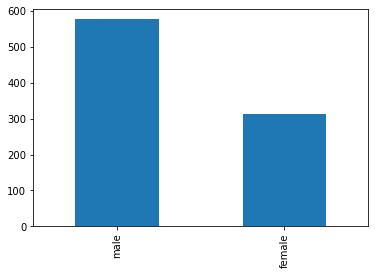

In [8]:
df.sex.value_counts().plot(kind='bar')

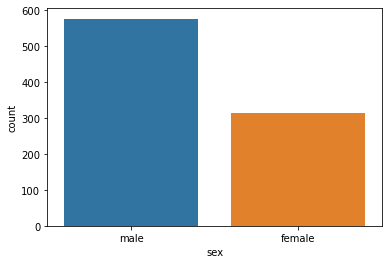

In [9]:
sns.countplot('sex', data=df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# age 칼럼의 null값을 pcclass(1,2,3) 각 클래스의 평균 연령으로 채운다..

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [15]:
sum(np.isnan(df.age))

177

In [18]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [19]:
# 1. pcclass의 클래별 평균연령구하기..

df.groupby('pclass')['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [21]:
# 2. age의 null값을 pclass의 평균나이로 대체..

In [23]:
age_list = []
for i in zip(df.age, df.pclass):
    if np.isnan(i[0]):
        if i[1] == 1:
            age_list.append(38)
        elif i[1] == 2:
            age_list.append(29)
        else:
            age_list.append(25)
    else:
        age_list.append(i[0])
age_list

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 25,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 29,
 31.0,
 25,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 25,
 19.0,
 25,
 25,
 40.0,
 38,
 25,
 66.0,
 28.0,
 42.0,
 25,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 25,
 3.0,
 19.0,
 25,
 25,
 25,
 25,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 38,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 38,
 25,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 25,
 25,
 0.83,
 30.0,
 22.0,
 29.0,
 25,
 28.0,
 17.0,
 33.0,
 16.0,
 25,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 25,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 25,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 25,
 38.0,
 25,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 70.5,
 29.0,
 24.0,
 2.0,
 21.0,
 25,
 32.5,
 32.5,
 54.0,
 12.0,
 25,
 24.0,
 25,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 25,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 9.0,
 36.5,
 42.0,
 51.0,
 22.0,
 55.

In [24]:
df['age'] = age_list

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


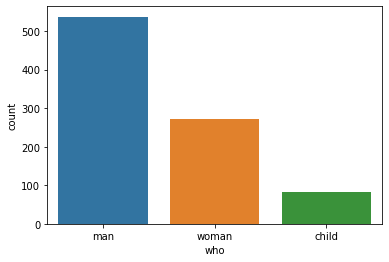

In [26]:
sns.countplot('who', data=df)

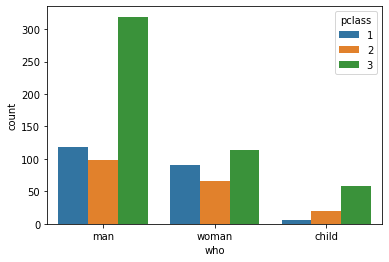

In [27]:
sns.countplot('who', data=df, hue='pclass')

In [28]:
# age 분포..

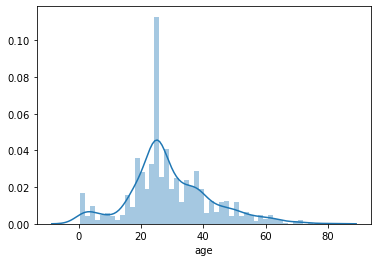

In [29]:
sns.distplot(df.age, bins= 50) # 20 ~ 40대..

In [30]:
# 살아남은 사람과 죽은 사람의 비율

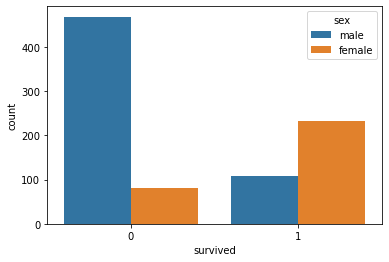

In [33]:
sns.countplot('survived', data=df, hue='sex')

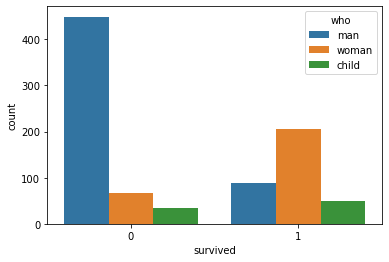

In [34]:
sns.countplot('survived', data=df, hue='who')

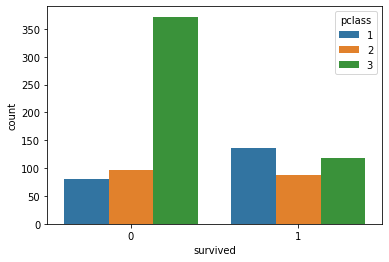

In [35]:
sns.countplot('survived', data=df, hue='pclass')

In [36]:
# 연령에 따른 생존분석...

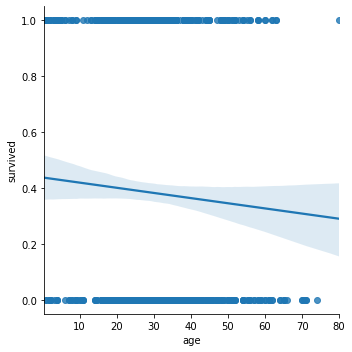

In [37]:
sns.lmplot(x='age', y = 'survived', data=df)

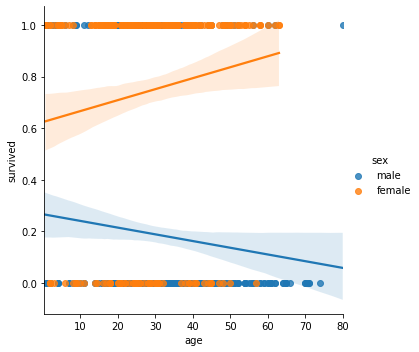

In [38]:
sns.lmplot(x='age', y = 'survived', data=df, hue='sex')

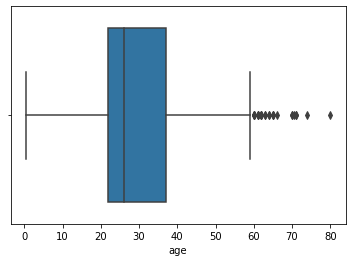

In [39]:
sns.boxplot('age', data=df)